# King Country House Price - Ev Fiyat Tahminleme

In [93]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
##from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

In [94]:
df = pd.read_csv('kc_house_data.csv')

### EDA - Exploratory Data Analysis

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [96]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [97]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [98]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [99]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [100]:
df.corr() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Evin YatakOdası ve Banyo Sayısı ve Metrekaresi Fiyatını Belirleyici Parametrelerdir.

%20 ile %90 arasındaki corelasyon değerleri alınır.

In [101]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

Heatmap olarak detaylı bakılması sağlanır.

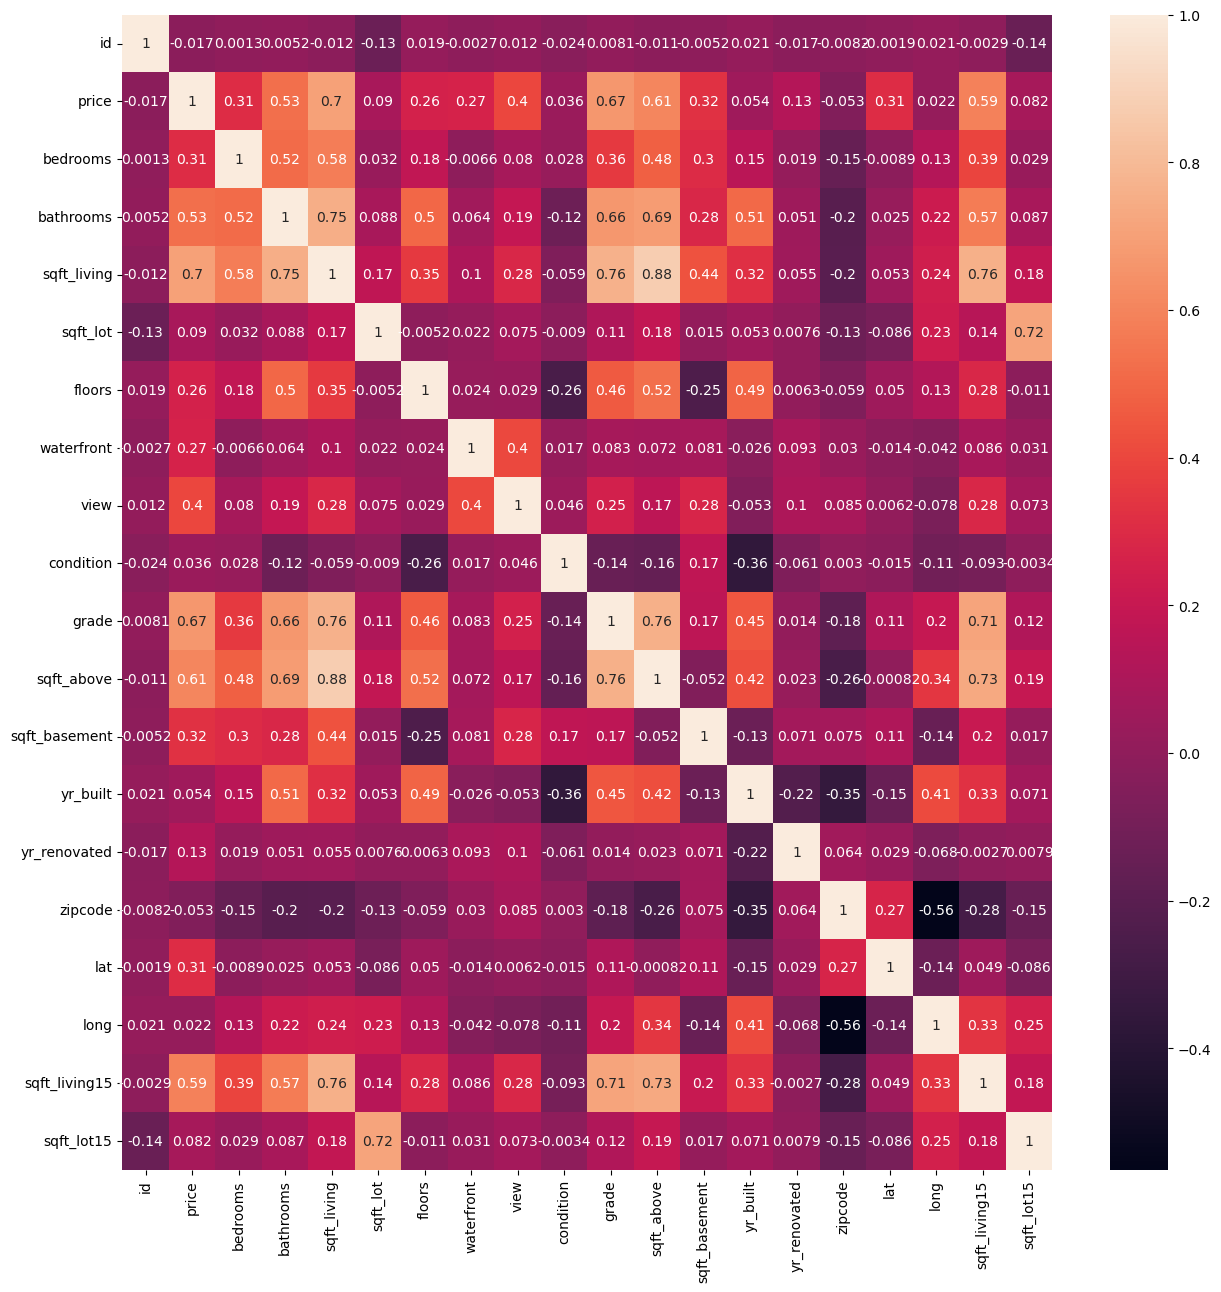

In [102]:
ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot = True);

### Data Visualization (veri görselleştirme)
### Outlier 'ın Bulunması

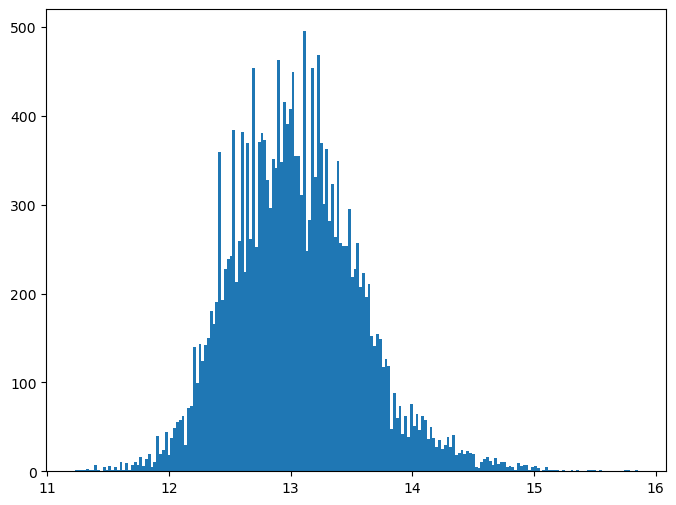

In [103]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.price)), bins=200);

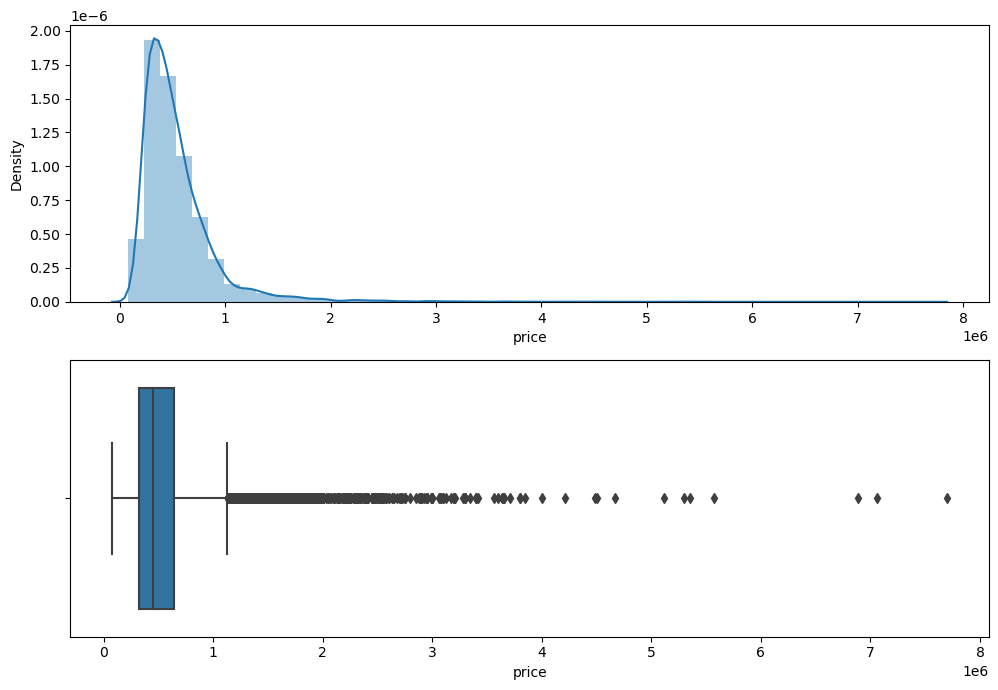

In [104]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout();

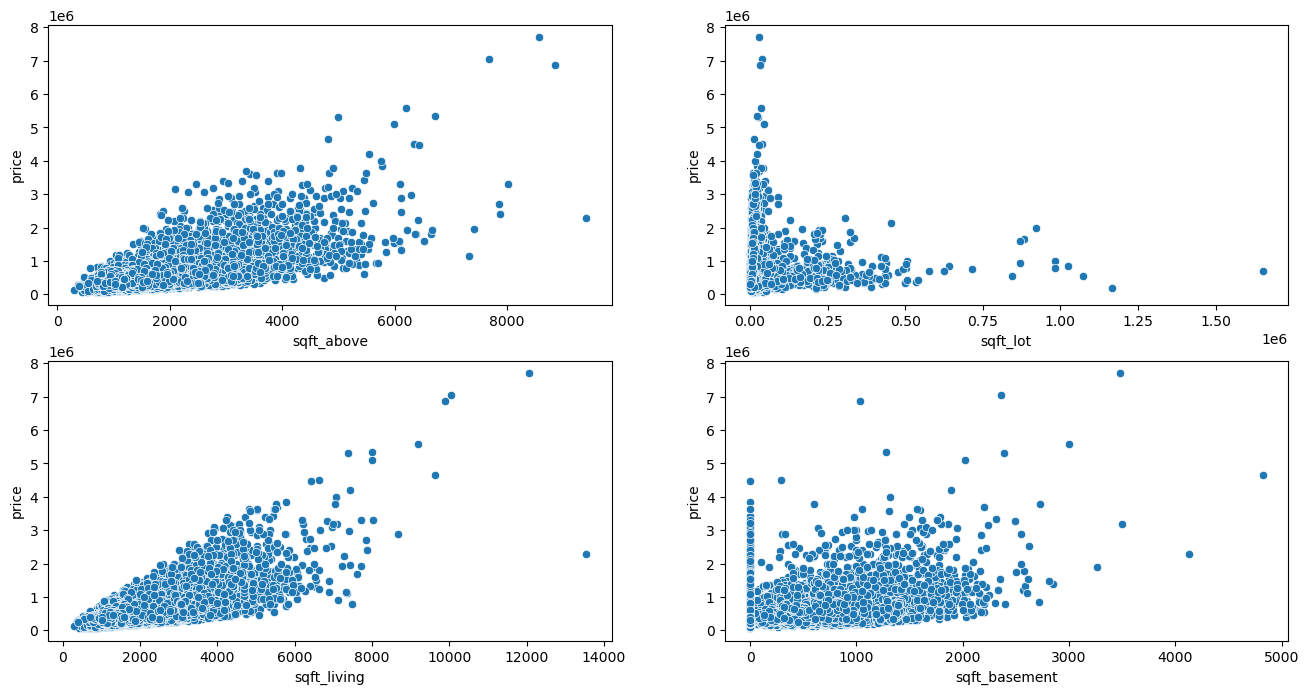

In [105]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft_above'], df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['sqft_lot'],df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['sqft_living'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['sqft_basement'],df['price']);


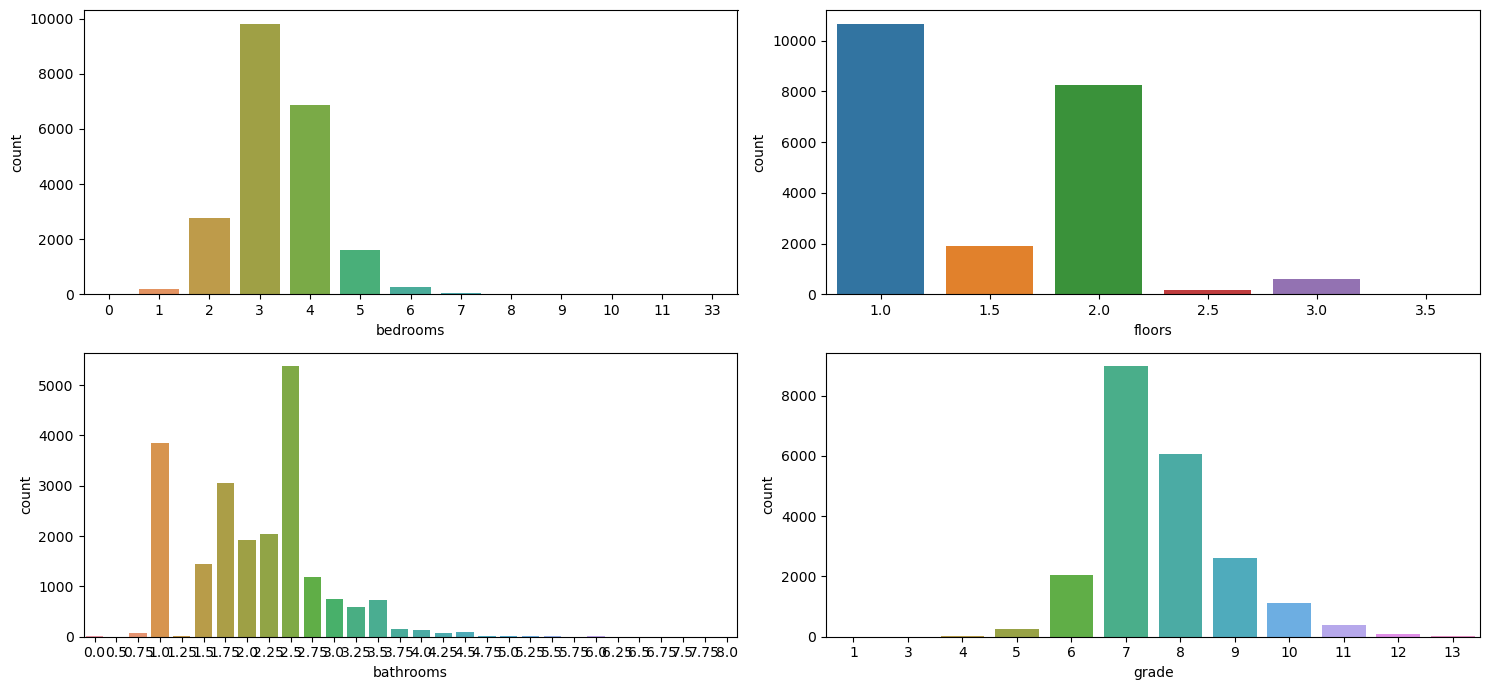

In [106]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(df['grade'])
plt.tight_layout()

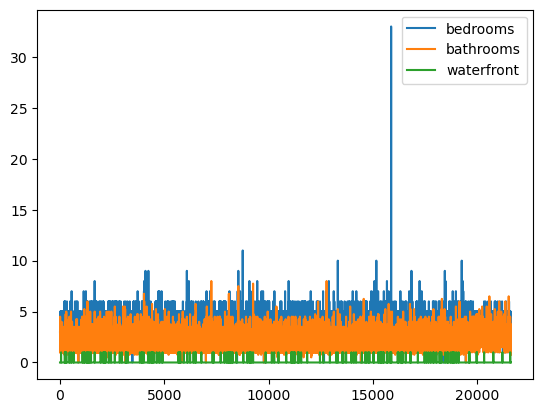

In [107]:
df.bedrooms.plot(), df.bathrooms.plot(), df.waterfront.plot()
plt.legend();

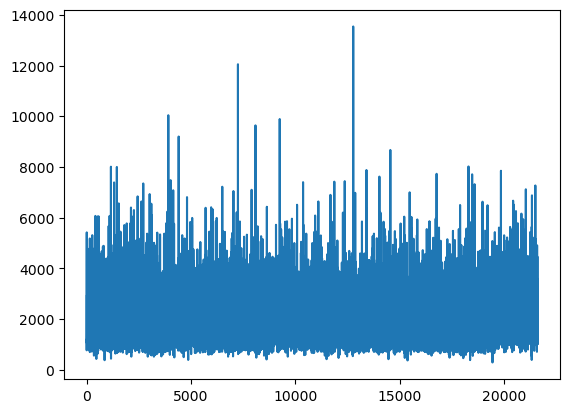

In [108]:
df.sqft_living.plot();

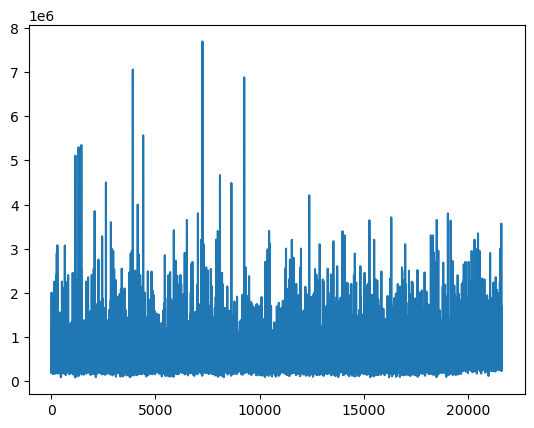

In [109]:
df.price.plot();

<AxesSubplot:>

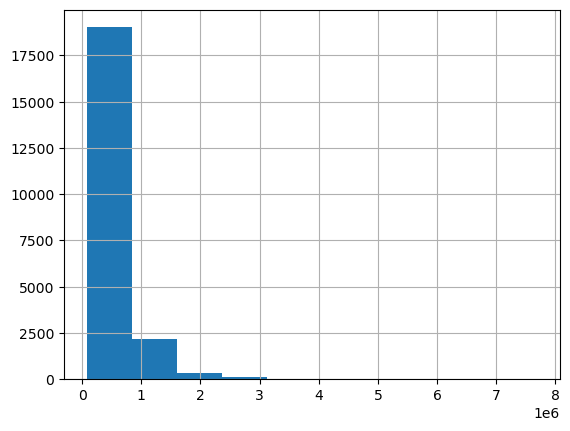

In [110]:
df.price.hist()

In [111]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)  
IQR = Q3 - Q1
print(IQR)

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


### Feature Engineering (Öznitelik Mühendisliği)


###### Elimizde olan verilerle bir çıkarım yaparak yeni veri oluşturmak (çıkarım sanatı) örnek olarak bina yapım yılından binanın yaşını çıkarmak ve bunu sutun haline getirip dataya eklemek 

## Veriyi Zengileştirilmesi 

In [112]:
df['zipcode']=df['zipcode'].astype("category")

In [113]:
df=df[df['bedrooms']<7]

In [114]:
df=df[df['bathrooms']<5]

In [115]:
df['bedrooms']=df['bedrooms']**2 

In [116]:
df['age']=2022-df['yr_built']

In [117]:
df['bathrooms']=df['bathrooms']**2

In [118]:
import numpy as np
df['basement']= np.where(df['sqft_basement']>0, 1, 0)
df['renovated'] = np.where(df['yr_renovated']>0, 1, 0)


In [119]:
df.quantile(.97).astype('int')

id              -2147483648
price               1350900
bedrooms                 25
bathrooms                12
sqft_living            4070
sqft_lot              66315
floors                    2
waterfront                0
view                      3
condition                 5
grade                    10
sqft_above             3650
sqft_basement          1320
yr_built               2013
yr_renovated           1989
lat                      47
long                   -121
sqft_living15          3550
sqft_lot15            51400
age                     112
basement                  1
renovated                 1
Name: 0.97, dtype: int32

In [120]:
outliers = df.quantile(.97)
df = df[(df['price']<outliers['price'])]
df = df[(df['bedrooms']<outliers['bedrooms'])]
df = df[(df['sqft_living']<outliers['sqft_living'])]

In [121]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,basement,renovated
count,1.897800e+04,1.897800e+04,18978.000000,18978.000000,18978.000000,1.897800e+04,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000
mean,4.606337e+09,4.754280e+05,10.530246,4.445786,1899.130203,1.411668e+04,1.471941,0.003847,0.176099,3.406365,7.506903,1661.133997,237.996206,1970.526241,76.121667,47.556926,-122.215489,1895.565233,12162.538518,51.473759,0.361787,0.038149
std,2.882565e+09,2.201288e+05,4.289758,2.757221,705.905924,3.866646e+04,0.541443,0.061903,0.652819,0.648877,1.031914,679.735232,374.332900,29.227560,382.247098,0.141443,0.143021,595.827574,25432.210821,29.227560,0.480530,0.191562
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.000000,0.000000,0.000000
25%,2.130827e+09,3.100000e+05,9.000000,2.250000,1360.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1159.250000,0.000000,1951.000000,0.000000,47.459400,-122.332000,1460.000000,5000.000000,26.000000,0.000000,0.000000
50%,3.904980e+09,4.300000e+05,9.000000,4.000000,1800.000000,7.425000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1974.000000,0.000000,47.567750,-122.238000,1780.000000,7500.000000,48.000000,0.000000,0.000000
75%,7.345528e+09,5.950000e+05,16.000000,6.250000,2340.000000,1.017750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2040.000000,460.000000,1996.000000,0.000000,47.680075,-122.125000,2250.000000,9791.500000,71.000000,1.000000,0.000000
max,9.900000e+09,1.350000e+06,16.000000,22.562500,4060.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,4060.000000,2030.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,560617.000000,122.000000,1.000000,1.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18978 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             18978 non-null  int64   
 1   date           18978 non-null  object  
 2   price          18978 non-null  float64 
 3   bedrooms       18978 non-null  int64   
 4   bathrooms      18978 non-null  float64 
 5   sqft_living    18978 non-null  int64   
 6   sqft_lot       18978 non-null  int64   
 7   floors         18978 non-null  float64 
 8   waterfront     18978 non-null  int64   
 9   view           18978 non-null  int64   
 10  condition      18978 non-null  int64   
 11  grade          18978 non-null  int64   
 12  sqft_above     18978 non-null  int64   
 13  sqft_basement  18978 non-null  int64   
 14  yr_built       18978 non-null  int64   
 15  yr_renovated   18978 non-null  int64   
 16  zipcode        18978 non-null  category
 17  lat            18978 non-null  

In [126]:
x = df[['bedrooms','bathrooms','sqft_living','grade','view','basement','waterfront','floors','age','renovated','condition','sqft_above','zipcode']]

In [127]:
x.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,condition,sqft_above,zipcode
0,9,1.0000,1180,7,0,0,0,1.0,67,0,3,1180,98178
1,9,5.0625,2570,7,0,1,0,2.0,71,1,3,2170,98125
2,4,1.0000,770,6,0,0,0,1.0,89,0,3,770,98028
3,16,9.0000,1960,7,0,1,0,1.0,57,0,5,1050,98136
4,9,4.0000,1680,8,0,0,0,1.0,35,0,3,1680,98074


In [128]:
y = df[['price']]

In [129]:
y.shape

(18978, 1)

In [130]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [131]:
x=pd.get_dummies(x,drop_first=True)

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [133]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15182, 81), (3796, 81), (15182, 1), (3796, 1))

In [134]:
x.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,condition,sqft_above,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,67,0,3,1180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,71,1,3,2170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,89,0,3,770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,57,0,5,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,35,0,3,1680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## LinearRegression Model Öğrenmesi

In [135]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train) #model verinin her birimini ziyaret edip ogeniyor

In [136]:
y_pretest = regmodel.predict(x_test) # test verisinde ev fiyatlarini tahmin ettik

In [137]:
(mean_squared_error(y_test,y_pretest))**0.5 #karekökünü aldık **0.5 ile 

92446.70066187262

In [138]:
r2_score(y_test,y_pretest)

0.8147075551822037

# Ridge ve Lasso ile Model Öğrenmesi

In [139]:
from sklearn.linear_model import Ridge,Lasso

In [143]:
#Ridge Regression

In [140]:
R = Ridge()
R.fit(x_train,y_train)
y_pred_ridge = R.predict(x_test) 

In [141]:
(mean_squared_error(y_test,y_pred_ridge))**0.5 #karekökünü aldık **0.5 ile

92387.31779085727

In [142]:
r2_score(y_test,y_pred_ridge)

0.8149455228616551

In [48]:
#Lasso Regression

In [144]:
L = Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)
y_pred_lasso

array([621755.24293312, 374829.87368366, 255859.09093834, ...,
       832721.95029888, 644550.92769065, 397949.01362402])

In [145]:
(mean_squared_error(y_test,y_pred_lasso))**0.5 #karekökünü aldık **0.5 ile 

92433.48758518577

In [146]:
r2_score(y_test,y_pred_lasso)

0.814760517771526

# Elastic Net

In [52]:
#Elastic Net #Lasso ile Ridge'i kullanır. Hangisinin iyi yönleri varsa onları kullanır

In [147]:
from sklearn.linear_model import ElasticNet 

In [148]:
E = ElasticNet(l1_ratio = .8)

In [149]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [150]:
(mean_squared_error(y_test,y_pred_elastic))**0.5 #karekökünü aldık **0.5 ile

138537.35133782

In [151]:
r2_score(y_test,y_pred_elastic)


0.5838895336913565

In [152]:
# ExtraTreeRegressor
ETR = ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test) 

In [153]:
(mean_squared_error(y_test,y_pred_etr))**0.5  

137155.69261406202

In [154]:
r2_score(y_test,y_pred_etr)

0.5921480393594514

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
#GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [157]:
y_pred_gbr = GBR.predict(x_test)

In [158]:
(mean_squared_error(y_test,y_pred_gbr))**0.5  

110123.16532676757

In [159]:
r2_score(y_test,y_pred_gbr)

0.7370747767813122

In [160]:
#K- Neighbors  #konuma göre komsularin ev fiyatlarına bakarak fiyat tahmin ediyor 
from sklearn.neighbors import KNeighborsRegressor       
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')
model = est.fit(x_train,y_train)

In [161]:
y_pred_knb = model.predict(x_test)

In [162]:
y_pred_knb.shape

(3796, 1)

In [163]:
(mean_squared_error(y_test,y_pred_knb))**0.5  

163647.3158078088

In [164]:
r2_score(y_test,y_pred_knb)


0.41937911720765686

In [165]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [166]:
y_pred_xgb = model.predict(x_test)

In [167]:
(mean_squared_error(y_test,y_pred_xgb))**0.5

93087.86541117264

In [168]:
r2_score(y_test,y_pred_xgb)

0.8121284482471838

In [169]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [170]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Lasso,0.822088,94239.205610,67021.757719
Linear,0.822066,94245.159183,67030.717551
Ridge,0.821590,94370.979150,67174.374171
XGradientBooting,0.815575,95948.606381,65596.892337
Gradient Boosting,0.739470,114040.281761,85291.335432
Extra Tree,0.640517,133957.911743,89793.623222
ElasticNet,0.545536,150618.727395,115560.186787


In [171]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [172]:
y_test = np.array(list(y_test))
y_pred = np.array(pred)
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [173]:
chart_regression(pred.flatten(),y_test.flatten())

ValueError: All arrays must be of the same length

In [ ]:
#pip install keras

In [ ]:
#pip install tensorflow

In [174]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

In [175]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

NameError: name 'Sequential' is not defined

In [176]:
model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test),batch_size=128,epochs=1500)
model.summary()

TypeError: fit() got an unexpected keyword argument 'x'

In [177]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

AttributeError: 'XGBRegressor' object has no attribute 'history'

In [178]:
pred=model.predict(x_test)

In [179]:
(mean_squared_error(y_test,pred))**0.5  

ValueError: Found input variables with inconsistent numbers of samples: [1, 3796]

In [180]:
r2_score(y_test,pred)

ValueError: Found input variables with inconsistent numbers of samples: [1, 3796]

In [181]:
chart_regression(y_test.flatten(),pred.flatten())

ValueError: All arrays must be of the same length

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,pred)
# Perfect predictions
plt.plot(y_test,y_test,'r');

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- pred)
sns.distplot(residuals);